# Salary Data Analysis Using Simple Linear Regression


#### Libraries/Packages :

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Read CSV data file :

In [58]:
salary_data = pd.read_csv('employee-salary-prediction-data-kaggle.csv')

#### Heading and 5 rows of data file :

In [59]:
salary_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


#### Meta Data of columns :

In [60]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


#### Statistical metrics behind the data :

In [61]:
salary_data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


#### Checking Duplicate Record Rows in Data : 

In [62]:
salary_data[salary_data.duplicated()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


#### Deleting Duplicate Record Rows : 

In [63]:
salary_data_unique = salary_data.drop_duplicates(keep = 'first')

#### Checking for Null values in Data :

In [64]:
salary_data_unique.isnull().sum()

Age                    1
Gender                 1
Education Level        1
Job Title              1
Years of Experience    1
Salary                 1
dtype: int64

#### Deleting Null values columns : 

In [65]:
salary_data_unique_notnull = salary_data_unique.dropna()

#### Statistical metrics behind the purified data :

In [66]:
salary_data_unique_notnull.describe()

,Age,Years of Experience,Salary
count,324.000000,324.000000,324.000000
mean,37.382716,10.058642,99985.648148
std,7.185844,6.650470,48652.271440
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.500000,9.000000,95000.000000
75%,44.000000,16.000000,140000.000000
max,53.000000,25.000000,250000.000000


#### Correlation between Years of Experience vs Salary :-

In [67]:
correlation_data = salary_data_unique_notnull[['Years of Experience', 'Salary']].corr()

In [68]:
correlation_data

,Years of Experience,Salary
Years of Experience,1.000000,0.924455
Salary,0.924455,1.000000


#### Plot between Years of Experience vs Salary :-

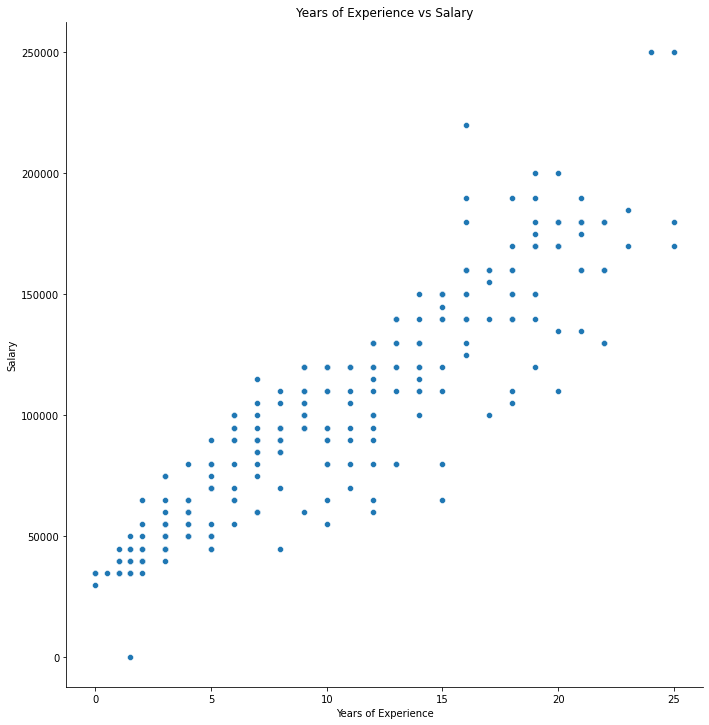

In [69]:
sb.pairplot(salary_data_unique_notnull, x_vars=['Years of Experience'],y_vars=['Salary'], height=10)
plt.title('Years of Experience vs Salary')
plt.show()

In [70]:
yoe = salary_data_unique_notnull['Years of Experience']
sal = salary_data_unique_notnull['Salary']

In [73]:
yoe_train, yoe_test, sal_train, sal_test = train_test_split(yoe, sal, train_size = 0.75, random_state = 21)

In [77]:
yoe_train = yoe_train.reshape(-1, 1)
yoe_test = yoe_test.reshape(-1, 1)

In [78]:
lr = LinearRegression()
lr.fit(yoe_train, sal_train)

LinearRegression()

In [84]:
print('Intercept:',lr.intercept_)
print('Coefficient:',lr.coef_)

Intercept of the model: 31050.829588087094
Coefficient of the line: [6750.8482216]
